<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Lineer Regression Project - Auto Scout</b></p>

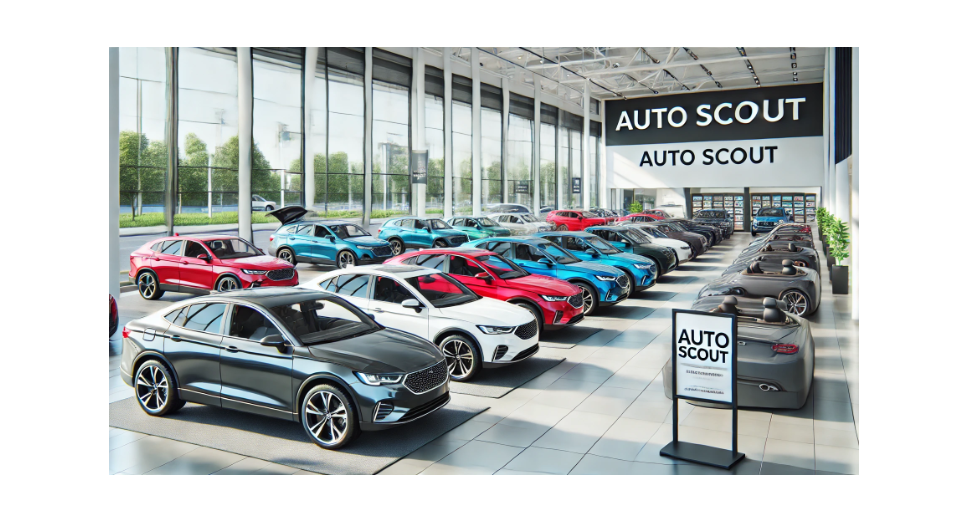

# <font color='steelblue'> <b>Introduction</b><font color='black'> 

**The goal of this project was to build a predictive model for car prices.** The process began with loading the dataset, reviewing it, and conducting Exploratory Data Analysis (EDA). After understanding the structure and properties of the data, it was split into training and test sets. Various regression techniques (**Linear Regression, Ridge, Lasso, and ElasticNet**) were implemented, and their performances were compared. The model performances were visualized graphically to determine the most suitable approach. Finally, feature importance was assessed, and a final model was developed for prediction purposes.

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset & EDA</a></li>
<li><a href="#linear-models">Regression Models</a></li>
<li><a href="#feature-importance">Feature Importance</a></li>
<li><a href="#compare-models">Compare Models Performance</a></li>
<li><a href="#final-model">Final Model and Prediction</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='import-library'></a>
# <font color='steelblue'> <b>Importing Libraries</b><font color='black'> 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from skimpy import skim

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='steelblue'> <b>Loading The Dataset</b><font color='black'> 

In [8]:
df0 = pd.read_csv('final_scout_not_dummy.csv')
df = df0.copy()

**About the Dataset**

- Auto Scout data was taken from the online automobile trading company [AutoScout24](https://www.autoscout24.com) in 2019 and includes many features of 9 different car models.

1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

In [10]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


<a id='understanding-dataset'></a>
# <font color='steelblue'> <b>Understanding The Dataset & EDA</b><font color='black'> 

In [12]:
df.duplicated().sum()

1673

In [13]:
df.drop_duplicates(keep="first", inplace=True)

In [14]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [15]:
df.columns = df.columns.str.lower()
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   type                 14242 non-null  object 
 6   fuel                 14242 non-null  object 
 7   gears                14242 non-null  float64
 8   comfort_convenience  14242 non-null  object 
 9   entertainment_media  14242 non-null  object 
 10  extras               14242 non-null  object 
 11  safety_security      14242 non-null  object 
 12  age                  14242 non-null  float64
 13  previous_owners      14242 non-null  float64
 14  hp_kw                14242 non-null  float64
 15  inspection_new       14242 non-null  int6

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
gears,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
previous_owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kw,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [18]:
df.describe(include="object").T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
type,14242,5,Used,10172
fuel,14242,4,Benzine,7558
comfort_convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
entertainment_media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
extras,14242,659,Alloy wheels,5010
safety_security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
paint_type,14242,3,Metallic,13682


In [19]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14242  │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 23     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ price              │   0 │     0 │   18100 │    7421 │  4950 │  12950 │  16950 │  21900 │   74600 │  ▇▇▁   │  │
│ │ km                 │   0 │     0 │   32580 │   36860 │     0 │   3898 │  21000 │  47000 │  317000 │   ▇▂   │  │
│ │ gears              │   0 │     0 │    5.94 │  0.7028 │     5 │      5 │      6 │      6 │       8 │ ▃ ▇ ▃  │  │
│ │ age                │   0 │     0 │   1.415 │    1.11 │     0 │      0 │      1 │      2 │       3 │ ▇ ▇ ▅▆ │  │
│ │ previous_owners    │   0 │     0 │   1.041 │  0.3374 │     0 │      1 │      1 │      1 │       4 │   ▇ ▁  │  │
│ │ hp_kw              │   0 │     0 │   88.71 │   26.55 │    40 │     66 │     85 │    103 │     294 │  ▇▇▂   │  │
│ │ inspection_new     │   0 │     0 │  0.2563 │  0.4366 │     0 │      0 │      0 │      1 │       1 │ ▇    ▃ │  │
│ │ displacement_cc    │   0 │     0 │    1433 │   277.5 │   890 │   1229 │   1461 │   1598 │    2967 │  ▆▇▇▂  │  │
│ │ weight_kg          │   0 │     0 │    1342 │   201.2 │   840 │   1165 │   1320 │   1487 │    2471 │  ▁▇▃▁  │  │
│ │ cons_comb          │   0 │     0 │   4.825 │  0.8622 │     3 │    4.1 │    4.8 │    5.4 │     9.1 │  ▅▇▇▁  │  │
│ └────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make_model                           │     0 │         0 │                        2 │                28484 │  │
│ │ body_type                            │     0 │         0 │                      1.2 │                17647 │  │
│ │ vat                                  │     0 │         0 │                        2 │                28484 │  │
│ │ type                                 │     0 │         0 │                      1.1 │                15147 │  │
│ │ fuel                                 │     0 │         0 │                        1 │                14242 │  │
│ │ comfort_convenience                  │     0 │         0 │                       21 │               297923 │  │
│ │ entertainment_media                  │     0 │      

In [20]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
type                   0
fuel                   0
gears                  0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
age                    0
previous_owners        0
hp_kw                  0
inspection_new         0
paint_type             0
upholstery_type        0
gearing_type           0
displacement_cc        0
weight_kg              0
drive_chain            0
cons_comb              0
dtype: int64

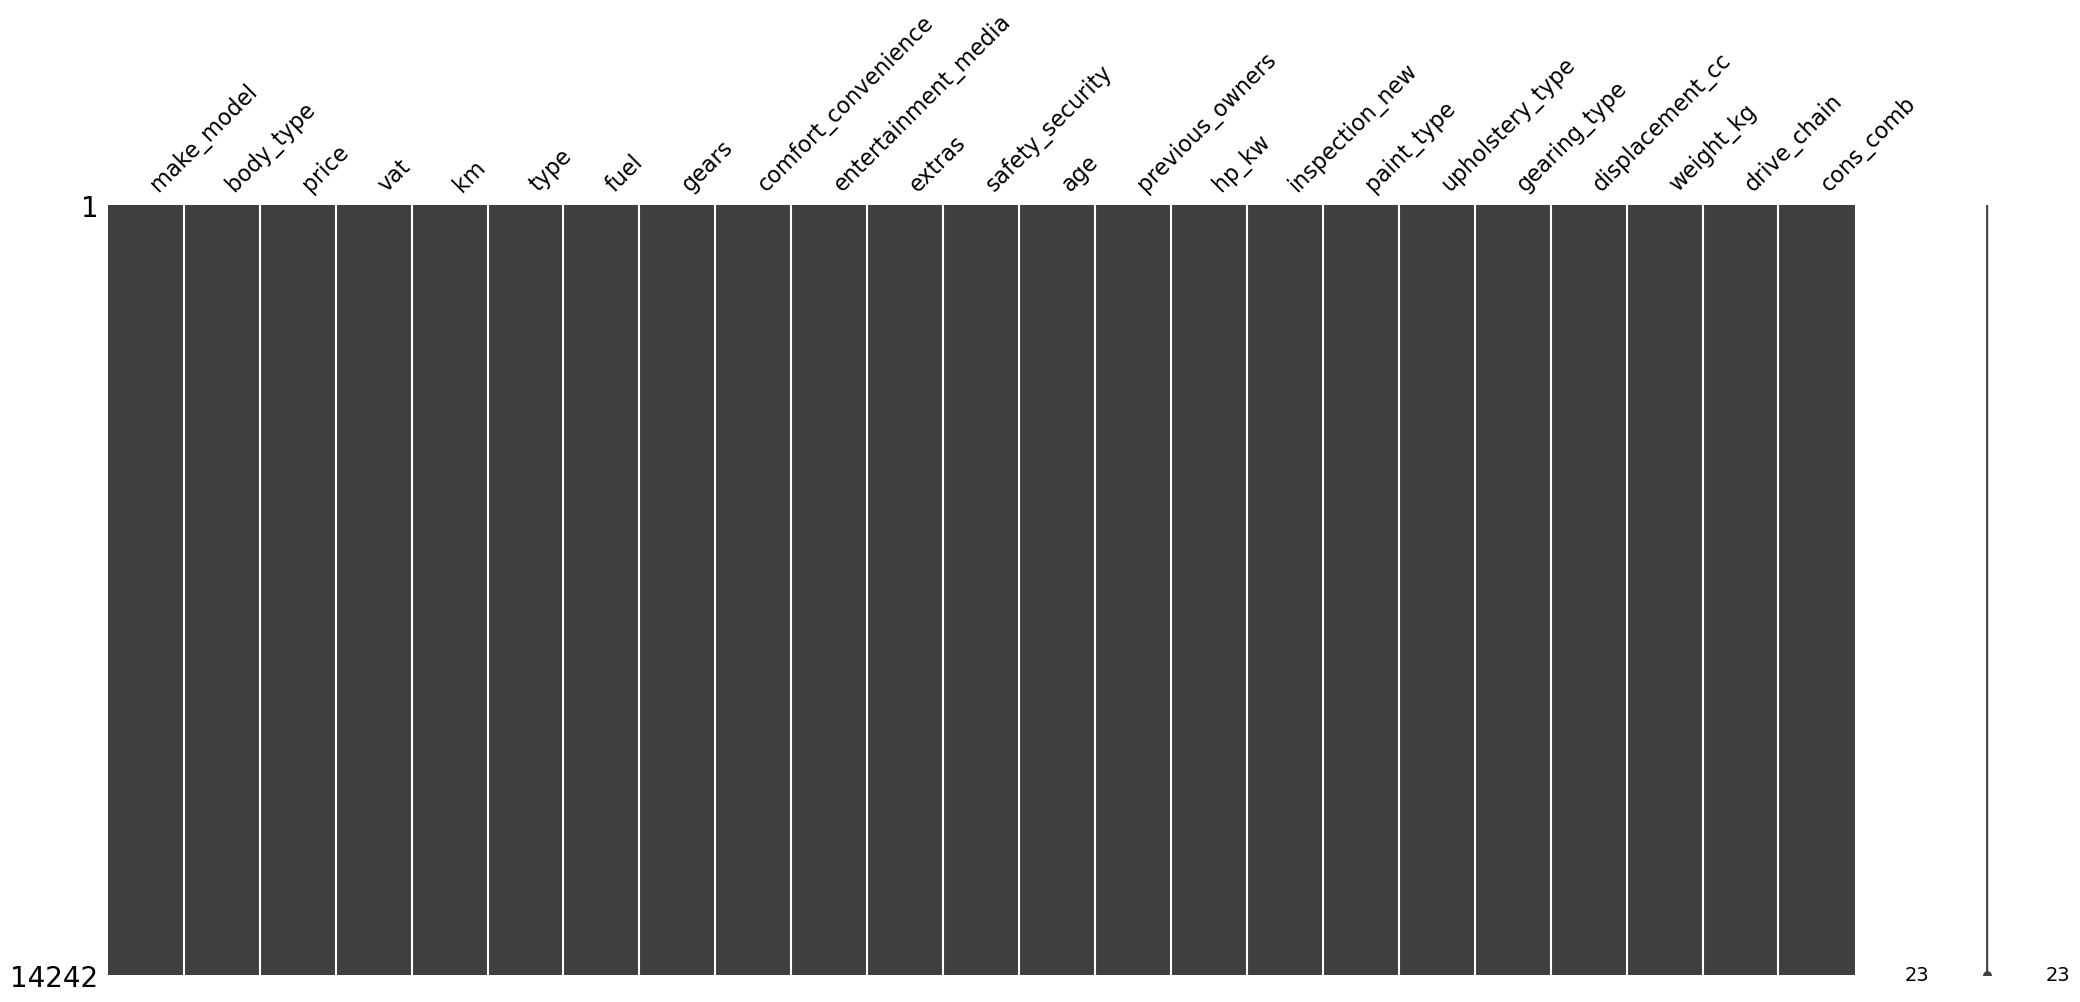

In [21]:
msno.matrix(df);

In [22]:
numeric_df = df.select_dtypes(include=["number"])
numeric_df.corr()[(numeric_df.corr()<= -0.9) & (numeric_df.corr() > -1)].any().any()

# We can check multicollinearity for correlation values ​​between -0.9 and -1 with this code.

False

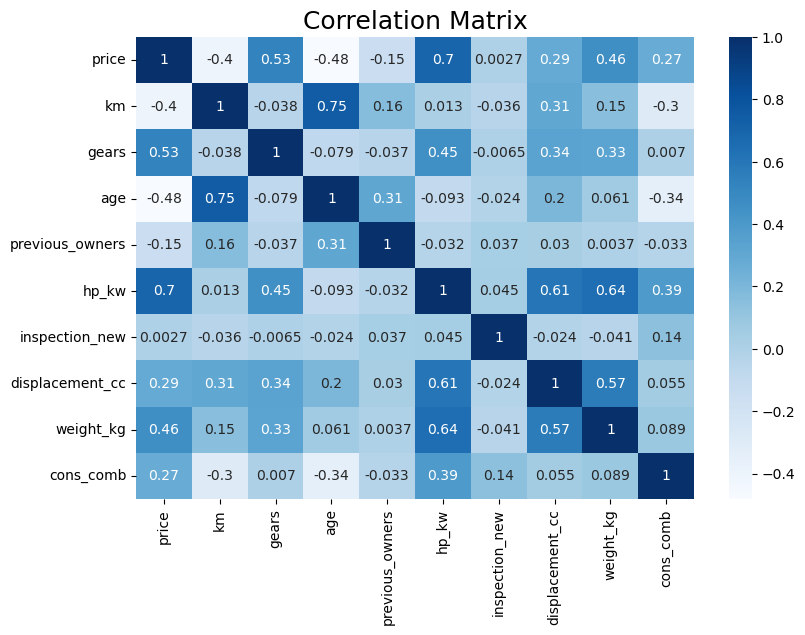

In [23]:
numeric_df = df.select_dtypes(exclude="object")

plt.figure(figsize=(9, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')

plt.title('Correlation Matrix', fontsize=18)
plt.show()

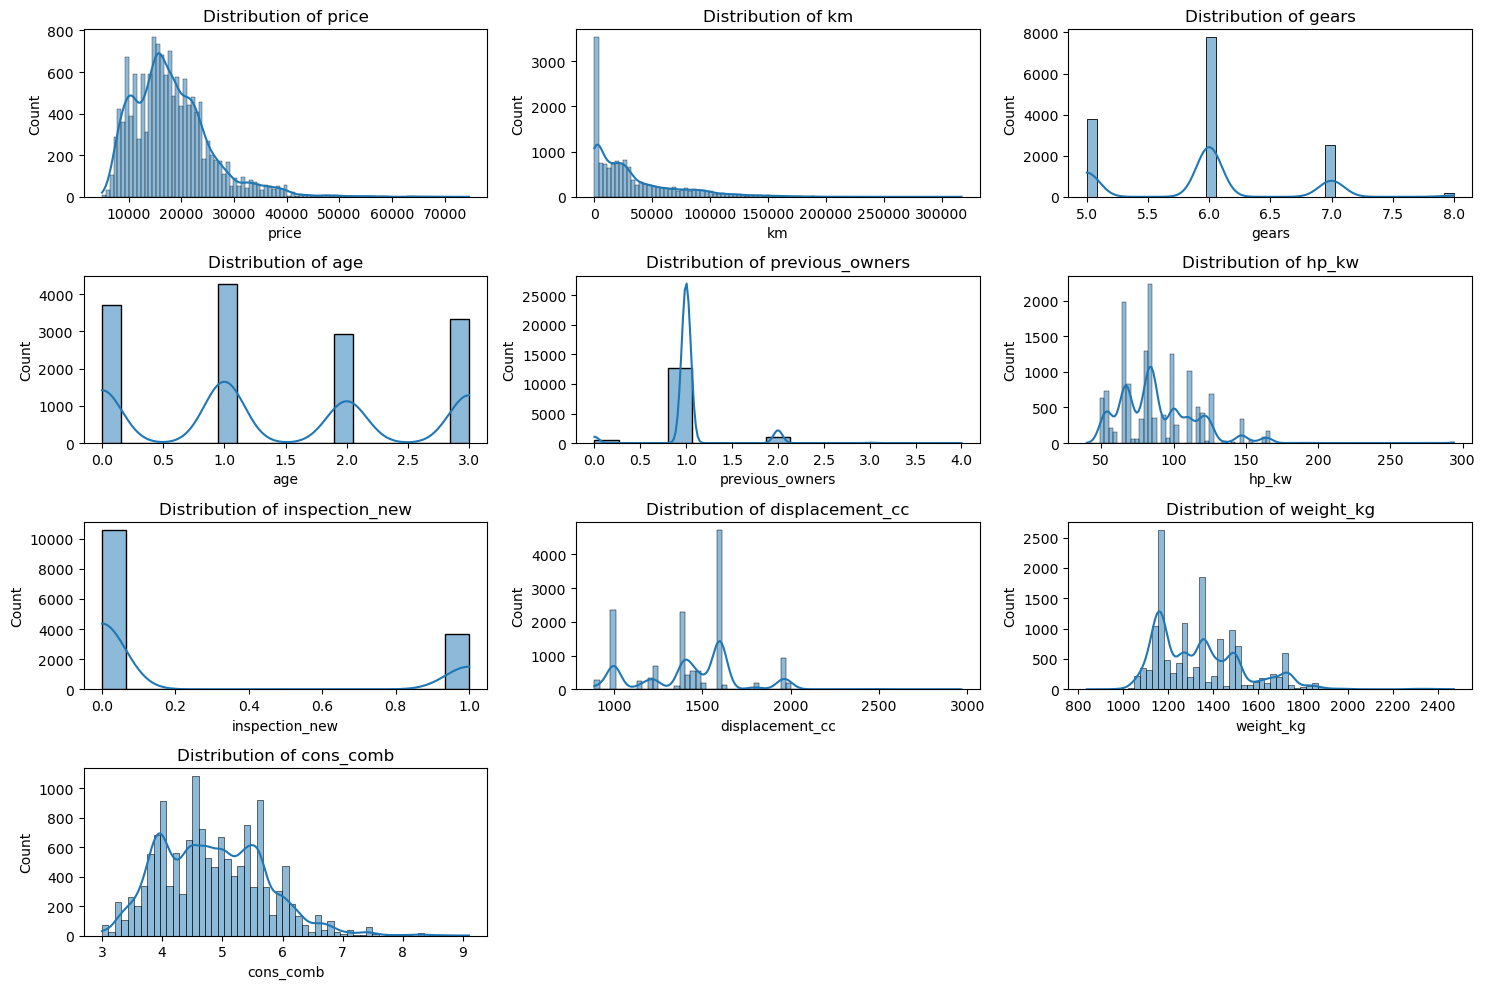

In [24]:
plt.figure(figsize=(15, 10))

num_vars = len(numeric_df.columns)

for i, var in enumerate(numeric_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

## <font color='#skyblue'> <b>Checking Outliers</b><font color='black'> 

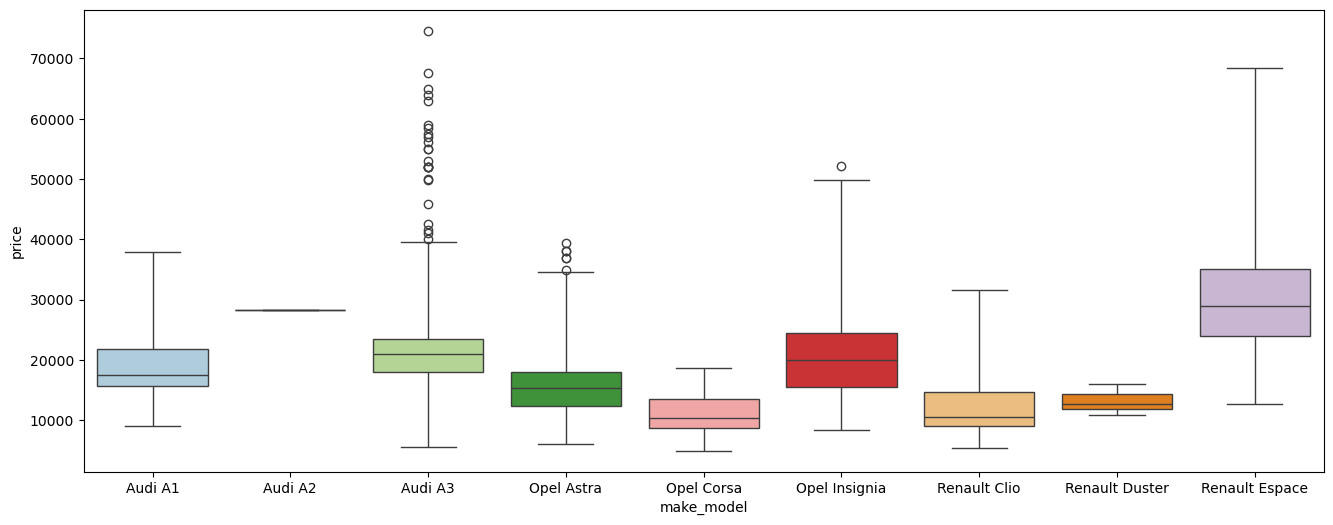

In [26]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3, palette='Paired')

plt.show()

In [44]:
df[df["make_model"] == "Audi A2"]

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [48]:
df.drop(index=[2614], inplace=True)

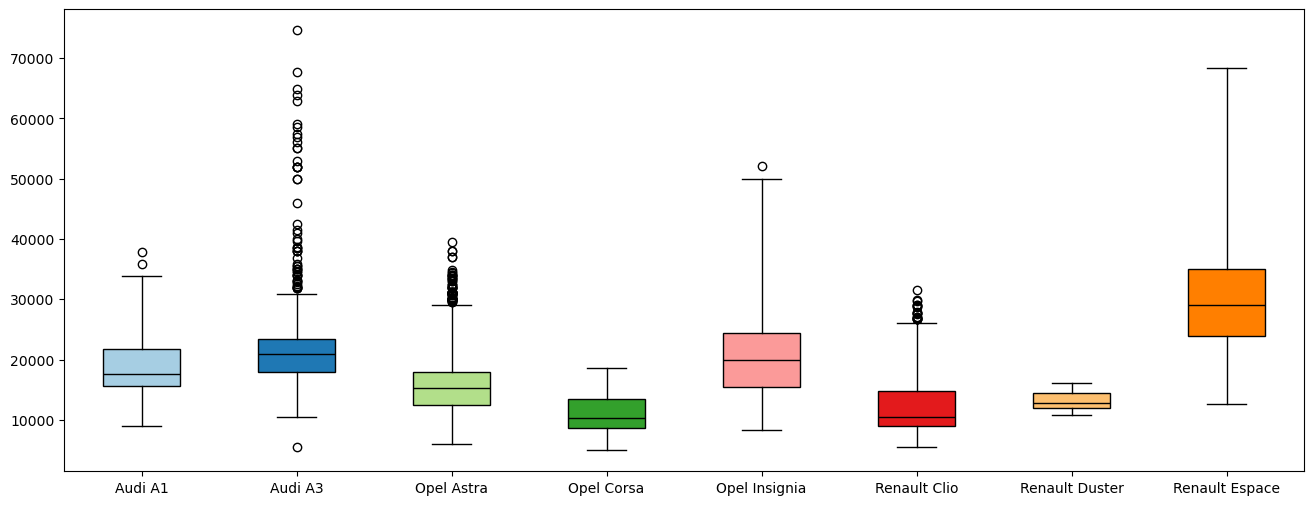

In [50]:
# Seaborn's boxplot function uses the same 'whis' value for all categories //
# // so we will use matplotlib's boxplot function to plot each category individually.

whisker_values = {
    'Audi A1': 2.0,
    'Audi A3': 1.5,
    'Opel Astra': 2.0,
    'Opel Corsa': 2.5,
    'Opel Insignia': 3.0,
    'Renault Clio': 2.0,
    'Renault Duster': 1.5,
    'Renault Espace': 3.0
}

palette = sns.color_palette("Paired", len(whisker_values))

plt.figure(figsize=(16, 6))

for i, (make_model, color) in enumerate(zip(whisker_values.keys(), palette)):
    model_data = df[df['make_model'] == make_model]['price']
    box = plt.boxplot(
        model_data, 
        positions=[i], 
        whis=whisker_values[make_model], 
        widths=0.5, 
        patch_artist=True,
        medianprops={'linewidth': 1, 'color': 'black'}
    )
    
    for patch in box['boxes']:
        patch.set_facecolor(color)

plt.xticks(range(len(whisker_values)), whisker_values.keys())
plt.show()


In [52]:
# Identifying observations that we consider to be outliers for each group according to the 1.5 Wisker value

total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


## <font color='#skyblue'> <b>Get Dummies</b><font color='black'> 

In [54]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep=",").add_prefix("cc_")) 
df = df.join(df["entertainment_media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep=",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep=",").add_prefix("ss_")) 

In [56]:
df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True) 

In [58]:
df = pd.get_dummies(df, drop_first=True)

In [60]:
bool_columns = df.columns[df.dtypes == "bool"] 
df[bool_columns] = df[bool_columns].astype(int) 

In [62]:
df.head() 

,price,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [64]:
df.shape

(14241, 133)

In [66]:
corr_by_price = df.corr()["price"].sort_values()[:-1] 

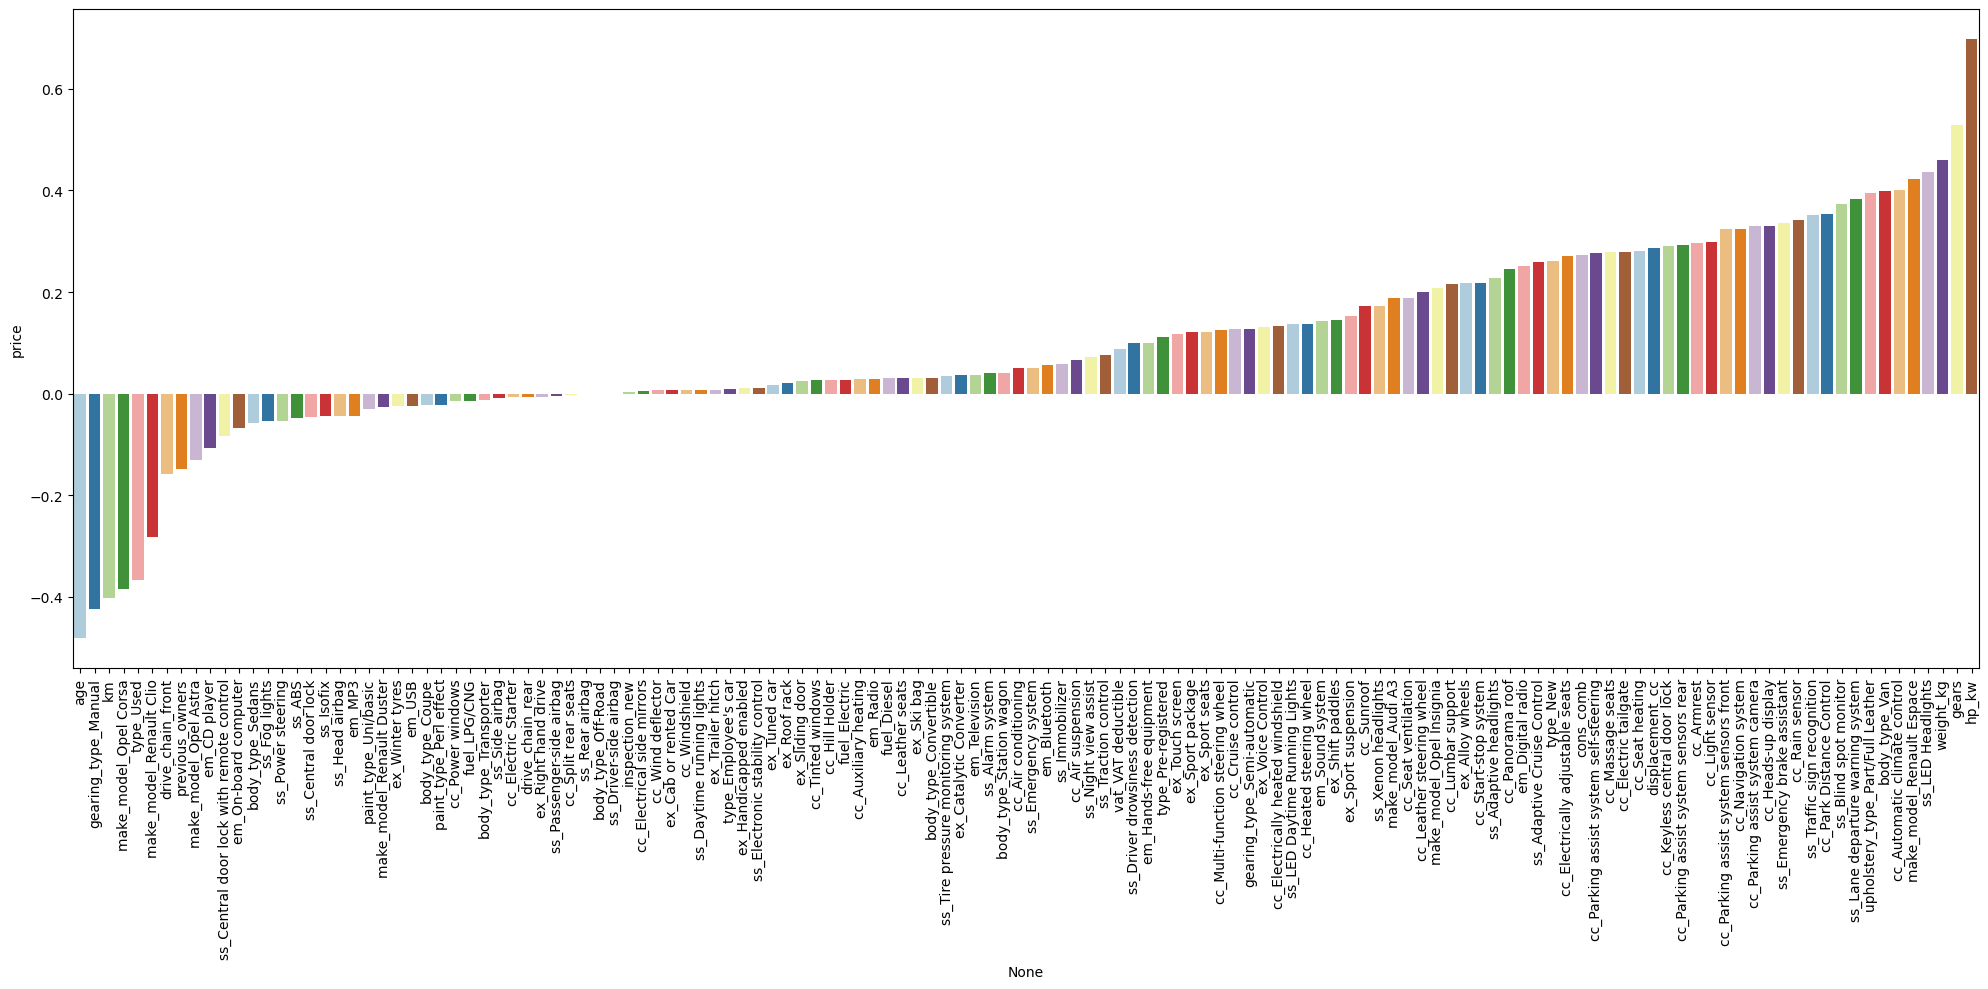

In [67]:
plt.figure(figsize=(20,10)) 
sns.barplot(x=corr_by_price.index, y=corr_by_price, palette='Paired') 

plt.xticks(rotation=90) 
plt.tight_layout(); 

<a id='linear-models'></a>
# <font color='steelblue'> <b>Regression Models</b><font color='black'> 

## <font color='#skyblue'> <b>Train | Test Split</b><font color='black'>

In [70]:
X= df.drop(columns="price")
y= df.price

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Display the shapes of the resulting datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11392, 132)
X_test shape: (2849, 132)
y_train shape: (11392,)
y_test shape: (2849,)


## <font color='#skyblue'> <b>Linear Regression</b><font color='black'>

In [307]:
linear = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = linear.predict(X_test)
y_train_pred = linear.predict(X_train)

In [82]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [158]:
lm = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
lm

,linear_train,linear_test
R2,0.890,0.885
mae,1720.196,1722.810
mse,6102138.823,6227552.124
rmse,2470.251,2495.506


In [86]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Calculating the R2 value of the model
    n = df.shape[0]                     # Getting the number of observations (samples) in the data set
    p = df.shape[1]-1                   # Getting the number of features 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Calculating the value using the Adjusted R2 formula
    return adj_r2

In [88]:
adj_r2(y_test, y_pred, df)

0.8828492602064298

In [ ]:
# Cross Validate (CV)
model = LinearRegression()

scores = cross_validate(estimator= linear, X= X_train, y=y_train,
               scoring= ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
               cv=10,
               return_train_score=True
              )

scores = pd.DataFrame(scores, index= range(1,11))
scores.iloc[:, 2:].mean() # Values ​​after CV

test_r2                                    0.885
train_r2                                   0.890
test_neg_mean_absolute_error           -1745.491
train_neg_mean_absolute_error          -1717.249
test_neg_mean_squared_error         -6330165.829
train_neg_mean_squared_error        -6076914.201
test_neg_root_mean_squared_error       -2512.671
train_neg_root_mean_squared_error      -2465.099
dtype: float64

In [94]:
2501.860 / df.price.mean()

# since we look at the error from averages, we will take the average of the value we want to predict // 
# // and divide the average of the errors (average of error metrics) by the average of the value we want to predict.

# The ratio of two average values ​​to each other will show how much error we made.
# According to the rmse score we get from the test set (hold out set) score we will give to the customer, our model makes an average error of 13.8%.

0.13822232155097283

In [309]:
y_pred = linear.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

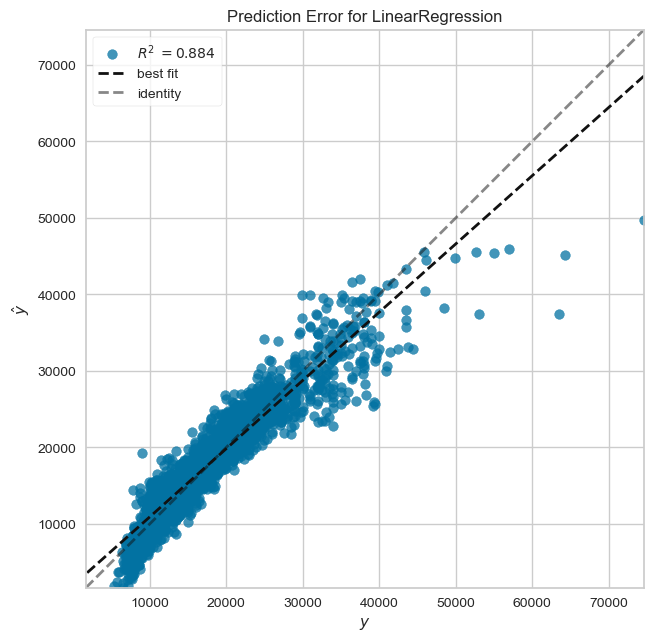

In [96]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

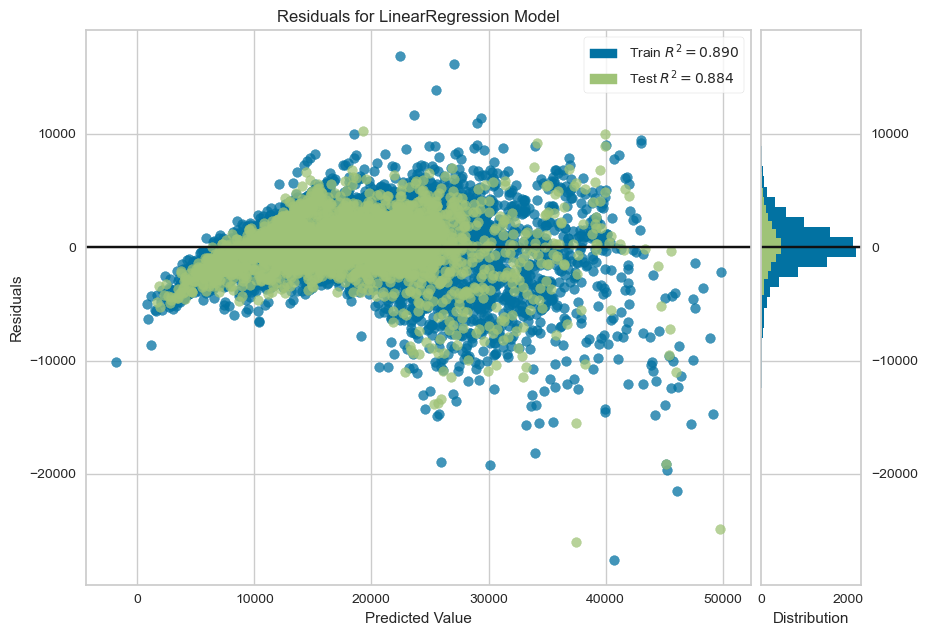

In [98]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();     

## <font color='#skyblue'> <b>Ridge</b><font color='black'>

In [100]:
alpha_space = np.logspace(-2, 1, 50)
param_grid = {"alpha": alpha_space}

ridge_model = Ridge()
grid_ridge = GridSearchCV(estimator= ridge_model,
                          param_grid= param_grid,
                          scoring= "neg_root_mean_squared_error",
                          cv= 10,
                          verbose= 1,
                          return_train_score= True
                         )
grid_ridge.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
        0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
        0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
        0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
        0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
        0.33932218,  0.39069399,  0.44984327,  0.51794747,  0.59636233,
        0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
        1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
        2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
        5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [102]:
grid_ridge.best_params_

{'alpha': 1.5998587196060574}

In [104]:
y_pred = grid_ridge.predict(X_test)
y_train_pred = grid_ridge.predict(X_train)

In [269]:
grid_ridge = Ridge(alpha= 1.5998587196060574).fit(X_train, y_train)

In [271]:
rm = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rm

,ridge_train,ridge_test
R2,0.890,0.885
mae,1720.196,1722.810
mse,6102138.823,6227552.124
rmse,2470.251,2495.506


In [122]:
2498.724 / df.price.mean()

0.13804906437415884

In [273]:
y_pred = grid_ridge.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## <font color='#skyblue'> <b>Lasso</b><font color='black'>

In [110]:
alpha_space = np.logspace(-2, 1, 50)
param_grid = {"alpha": alpha_space}

lasso_model = Lasso()
grid_lasso = GridSearchCV(estimator= lasso_model,
                          param_grid= param_grid,
                          scoring= "neg_root_mean_squared_error",
                          cv= 10,
                          verbose= 1,
                          return_train_score= True
                         )
grid_lasso.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
        0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
        0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
        0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
        0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
        0.33932218,  0.39069399,  0.44984327,  0.51794747,  0.59636233,
        0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
        1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
        2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
        5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [112]:
grid_lasso.best_params_

{'alpha': 0.9102981779915218}

In [114]:
y_pred = grid_lasso.predict(X_test)
y_train_pred = grid_lasso.predict(X_train)

In [275]:
grid_lasso = Lasso(alpha=0.9102981779915218).fit(X_train, y_train)

In [152]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.890,0.885
mae,1720.196,1722.810
mse,6102138.823,6227552.124
rmse,2470.251,2495.506


In [126]:
2495.506 / df.price.mean()

0.13787127687575723

In [279]:
y_pred = grid_lasso.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## <font color='#skyblue'> <b>Elastic-Net</b><font color='black'>

In [ ]:
alpha_space = np.logspace(-2, 1, 50)
param_grid = {"alpha": alpha_space,
             "l1_ratio":[0.1, 0.25, 0.5, 0.75, 1]
             }

elastic_model = ElasticNet()
grid_elastic = GridSearchCV(estimator= elastic_model,
                          param_grid= param_grid,
                          scoring= "neg_root_mean_squared_error",
                          cv= 10,
                          verbose= 1,
                          return_train_score= True
                         )
grid_elastic.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
        0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
        0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
        0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
        0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
        0.33932218,  0.3...327,  0.51794747,  0.59636233,
        0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
        1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
        2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
        5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ]),
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [130]:
grid_elastic.best_params_

{'alpha': 0.9102981779915218, 'l1_ratio': 1}

In [132]:
y_pred = grid_elastic.predict(X_test)
y_train_pred = grid_elastic.predict(X_train)

In [281]:
grid_elastic = ElasticNet(alpha= 0.9102981779915218, l1_ratio= 1).fit(X_train, y_train)

In [146]:
els = train_val(y_train, y_train_pred, y_test, y_pred, "elasticNet")
els

,elasticNet_train,elasticNet_test
R2,0.890,0.885
mae,1720.196,1722.810
mse,6102138.823,6227552.124
rmse,2470.251,2495.506


In [148]:
2495.506 / df.price.mean()

0.13787127687575723

In [283]:
y_pred = grid_elastic.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [285]:
pd.concat([lm, rm, lss, els], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test,elasticNet_train,elasticNet_test
R2,0.890,0.885,0.890,0.885,0.890,0.885,0.890,0.885
mae,1720.196,1722.810,1720.196,1722.810,1720.196,1722.810,1720.196,1722.810
mse,6102138.823,6227552.124,6102138.823,6227552.124,6102138.823,6227552.124,6102138.823,6227552.124
rmse,2470.251,2495.506,2470.251,2495.506,2470.251,2495.506,2470.251,2495.506


For these values:
- If feature selection is not important, **Linear Regression** may be preferred because its performance is the same as the others and it is a simpler model.
- If there is a risk of multicollinearity, **Ridge Regression** may be more appropriate.
- If you want to reduce the effect of unnecessary features, **Lasso Regression or ElasticNet** can be chosen.

<a id='feature-importance'></a>
# <font color='steelblue'> <b>Feature Importance</b><font color='black'> 

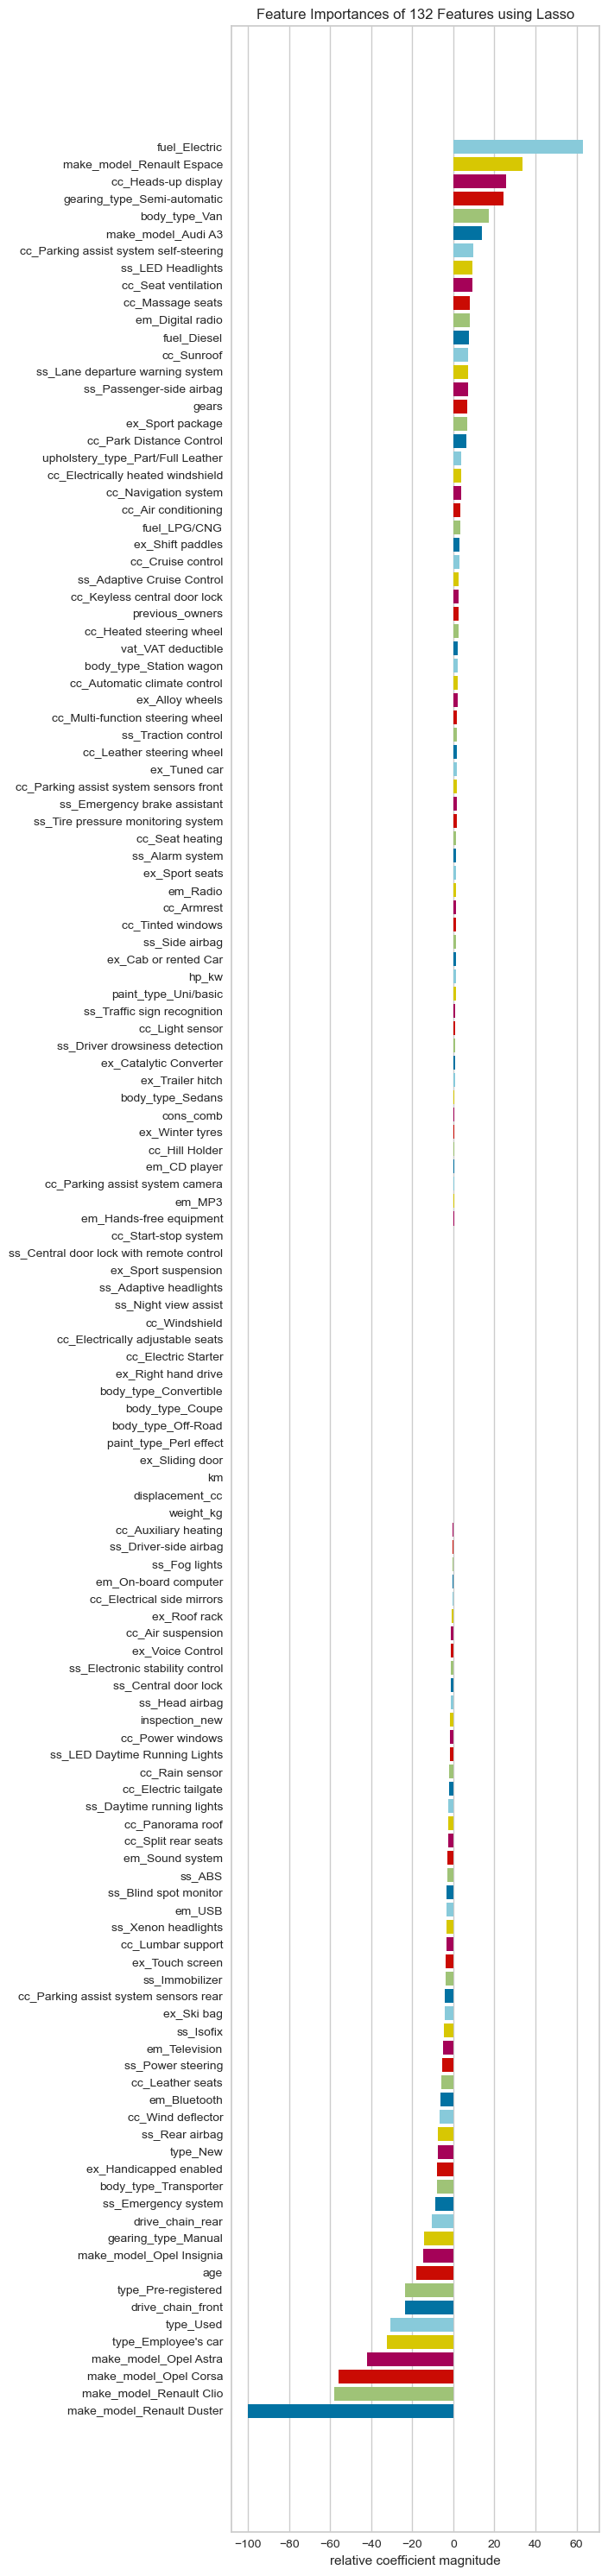

In [165]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha= 0.9102981779915218)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

In [239]:
df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "Fuel", "price"]]

# We choose the 5 features that have the most impact on forecasting.
# You may have a question like why the make_model feature was chosen here. //
# // When we examine the image above, we also chose the make_model feature since we saw that //
# // make_model feature has unique categorical observations (Audi A3, AudiA1, etc.) among the features that have the most impact on the prediction.

In [241]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,Fuel,price
0,Audi A1,66.000,56013.000,3.000,Automatic,Diesel,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,Benzine,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,Diesel,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,Diesel,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,Diesel,16790


In [243]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,Fuel,price
2614,Audi A2,85.000,26166.000,1.000,Manual,Diesel,28200


In [245]:
df_new.drop(index=[2614], inplace=True)

In [247]:
df_new = pd.get_dummies(df_new)

bool_columns = df_new.columns[df_new.dtypes == "bool"] 
df_new[bool_columns] = df_new[bool_columns].astype(int) 

df_new.head() 

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [254]:
df_new.shape

(15914, 19)

In [249]:
X_new = df_new.drop(columns='price')
y_new = df_new.price

In [251]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [ ]:
alpha_space = np.logspace(-2, 1, 50)
param_grid = {"alpha": alpha_space}

lasso_model2 = Lasso()
grid_lasso2 = GridSearchCV(estimator= lasso_model2,
                          param_grid= param_grid,
                          scoring= "neg_root_mean_squared_error",
                          cv= 10,
                          verbose= 1,
                          return_train_score= True
                         )
grid_lasso2.fit(X_train2, y_train2)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
        0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
        0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
        0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
        0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
        0.33932218,  0.39069399,  0.44984327,  0.51794747,  0.59636233,
        0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
        1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
        2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
        5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [257]:
grid_lasso2.best_params_

{'alpha': 0.015264179671752334}

In [259]:
lasso_model2 = Lasso(alpha=0.015264179671752334)
lasso_model2.fit(X_train2, y_train2)

Lasso(alpha=0.015264179671752334)

In [261]:
y_pred2 = lasso_model2.predict(X_test2)
y_train_pred2 = lasso_model2.predict(X_train2)

In [263]:
lss_new = train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")
lss_new

,lasso_new_train,lasso_new_test
R2,0.847,0.856
mae,1987.714,1949.253
mse,8315503.355,7882389.471
rmse,2883.661,2807.559


In [303]:
y_pred2 = lasso_model2.predict(X_test2)
fm_R2 = r2_score(y_test2, y_pred2)
fm_mae = mean_absolute_error(y_test2, y_pred2)
fm_rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))

<a id='compare-models'></a>
# <font color='steelblue'> <b>Compare Models Performance</b><font color='black'> 

In [315]:
scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    },
    "elastic_m": {
        "r2_score": em_R2,
        "mae": em_mae,
        "rmse": em_rmse
    },
    "lasso2_m": {
        "r2_score": fm_R2,
        "mae": fm_mae,
        "rmse": fm_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.884,1725.509,2501.860
ridge_m,0.884,1724.790,2498.724
lasso_m,0.885,1722.810,2495.506
elastic_m,0.885,1722.810,2495.506
lasso2_m,0.856,1949.253,2807.559


<a id='final-model'></a>
# <font color='steelblue'> <b>Final Model and Prediction</b><font color='black'> 

In [353]:
final_model = Lasso(alpha= 0.015264179671752334)

final_model.fit(X_new, y_new)

Lasso(alpha=0.015264179671752334)

## <font color='#skyblue'> <b>Prediction with New Observation</b><font color='black'>

In [339]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic",
    "Fuel": "Diesel"
}

In [343]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type,Fuel
0,66,2,17000,Audi A3,Automatic,Diesel


In [347]:
my_dict = pd.get_dummies(my_dict)

bool_columns = my_dict.columns[my_dict.dtypes == "bool"] 
my_dict[bool_columns] = my_dict[bool_columns].astype(int) 

my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic,Fuel_Diesel
0,66,2,17000,1,1,1


In [341]:
X_new.head(1)

# The feature ranking of the observation to be predicted must be the same as the feature ranking of the data we provide for training.

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG
0,66.000,56013.000,3.000,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [349]:
my_dict = my_dict.reindex(columns=X_new.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG
0,66,17000,2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [365]:
y_pred_final = final_model.predict(my_dict)
print("The predicted selling price of the vehicle is: ", y_pred_final[0].round(3))

The predicted selling price of the vehicle is:  18720.478


<a id='conclusion'></a>
# <font color='steelblue'> <b>Conclusion</b><font color='black'> 

As a result of the project, comparisons among various regression models enabled the identification of the best-performing method. The final model effectively predicted car prices using the key features that influence them. The findings highlight the importance of selecting the right regression technique for accurate car price prediction.

<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>